In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leitura dos arquivos CSV
df_clientes = pd.read_csv('..\\BASE_DADOS\\olist_customers_dataset.csv')
df_vendas = pd.read_csv('..\\BASE_DADOS\\olist_order_items_dataset.csv')
df_revisao_pedidos = pd.read_csv('..\\BASE_DADOS\\olist_order_reviews_dataset.csv')
df_pedidos_cliente = pd.read_csv('..\\BASE_DADOS\\olist_orders_dataset.csv')
df_produtos = pd.read_csv('..\\BASE_DADOS\\olist_products_dataset.csv')



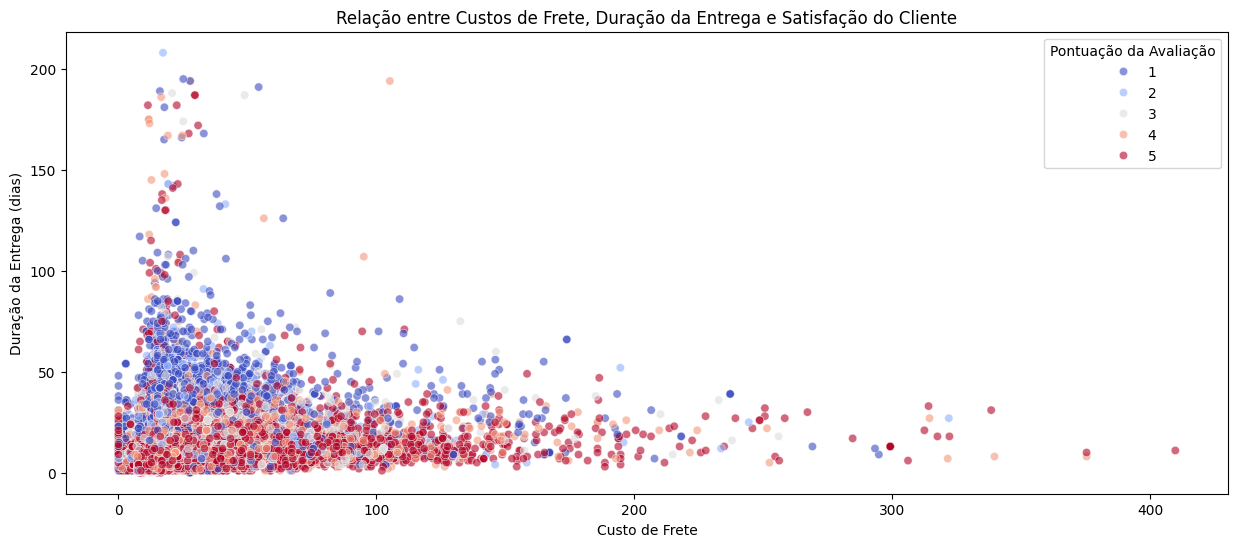

In [3]:
# QUESTAO 4
#b.	Análise de Custos de Frete: Investigar a relação entre custos de frete, distância de entrega e a satisfação do cliente.


# Carregamento dos dados
avaliacoes = df_revisao_pedidos
produtos = df_produtos
vendas = df_vendas
clientes = df_clientes
entregas = df_pedidos_cliente

# Mesclagem das tabelas de vendas com a de avaliações
dados_merged = pd.merge(vendas, avaliacoes, on='order_id')

# Mesclagem da tabela de produtos
dados_merged = pd.merge(dados_merged, produtos, on='product_id')

# Mesclagem com a tabela de entregas
dados_merged = pd.merge(dados_merged, entregas, on='order_id')

# Mesclagem com a tabela de clientes
dados_merged = pd.merge(dados_merged, clientes, on='customer_id')

# Calculo da duração da entrega
dados_merged['order_purchase_timestamp'] = pd.to_datetime(dados_merged['order_purchase_timestamp'])
dados_merged['order_delivered_customer_date'] = pd.to_datetime(dados_merged['order_delivered_customer_date'])
dados_merged['delivery_duration'] = (dados_merged['order_delivered_customer_date'] - dados_merged['order_purchase_timestamp']).dt.days

# Filtrar entregas realizadas
dados_merged = dados_merged[dados_merged['order_status'] == 'delivered']


#RESULTADOS


plt.figure(figsize=(15, 6))

#  Gráfico de custo de frete vs duração da entrega, colorido por satisfação do cliente
sns.scatterplot(data=dados_merged, x='freight_value', y='delivery_duration', hue='review_score', palette='coolwarm', alpha=0.6)
plt.title('Relação entre Custos de Frete, Duração da Entrega e Satisfação do Cliente')
plt.xlabel('Custo de Frete')
plt.ylabel('Duração da Entrega (dias)')
plt.legend(title='Pontuação da Avaliação', loc='upper right')
plt.show()





In [4]:
# Média de custo de frete e duração da entrega por pontuação de avaliação
media_frete_duracao_por_avaliacao = dados_merged.groupby('review_score')[['freight_value', 'delivery_duration']].mean()
print("\nMédia de Custo de Frete e Duração da Entrega por Pontuação de Avaliação:")
media_frete_duracao_por_avaliacao


Média de Custo de Frete e Duração da Entrega por Pontuação de Avaliação:


,freight_value,delivery_duration
review_score,,
1,21.059863,19.116192
2,20.929192,15.337838
3,20.286314,13.579420
4,20.033786,11.752644
5,19.566044,10.191565
